# US Accidents Exploratory Data Analysis

## Downloading Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [4]:
import opendatasets as od

download_url = 'https://www.kaggle.com/datasets/girishwaran/us-accidents-from-2016-to-2020'

od.download(download_url)

Skipping, found downloaded files in ".\us-accidents-from-2016-to-2020" (use force=True to force download)


## Data Preparation and Cleaning


In [6]:
df = pd.read_csv('us-accidents-from-2016-to-2020/US_Accidents_June20.csv')
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [7]:
df.shape

(3513617, 49)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [9]:
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.478818e+06,3.513617e+06,3.513617e+06,3.513617e+06,1.034799e+06,1.034799e+06,3.513617e+06,1.250753e+06,3.447885e+06,1.645368e+06,3.443930e+06,3.457735e+06,3.437761e+06,3.059008e+06,1.487743e+06
mean,2.080226e+02,2.339929e+00,3.654195e+01,-9.579151e+01,3.755758e+01,-1.004560e+02,2.816167e-01,5.975383e+03,6.193512e+01,5.355730e+01,6.511427e+01,2.974463e+01,9.122644e+00,8.219025e+00,1.598256e-02
std,2.076627e+01,5.521935e-01,4.883520e+00,1.736877e+01,4.861215e+00,1.852879e+01,1.550134e+00,1.496624e+04,1.862106e+01,2.377334e+01,2.275558e+01,8.319758e-01,2.885879e+00,5.262847e+00,1.928262e-01
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.363784e+01,-1.174418e+02,3.399477e+01,-1.183440e+02,0.000000e+00,8.640000e+02,5.000000e+01,3.570000e+01,4.800000e+01,2.973000e+01,1.000000e+01,5.000000e+00,0.000000e+00
50%,2.010000e+02,2.000000e+00,3.591687e+01,-9.102601e+01,3.779736e+01,-9.703438e+01,0.000000e+00,2.798000e+03,6.400000e+01,5.700000e+01,6.700000e+01,2.995000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.010000e+02,3.000000e+00,4.032217e+01,-8.093299e+01,4.105139e+01,-8.210168e+01,1.000000e-02,7.098000e+03,7.590000e+01,7.200000e+01,8.400000e+01,3.009000e+01,1.000000e+01,1.150000e+01,0.000000e+00
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,1.706000e+02,1.150000e+02,1.000000e+02,5.774000e+01,1.400000e+02,9.840000e+02,2.500000e+01


In [10]:
# how many numeric columns are in the dataset

numerics = ['int16','int32','int64','float16','float32','float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

15

In [11]:
# count no. of null values in each column

df.isna().sum().sort_values(ascending=False)

End_Lng                  2478818
End_Lat                  2478818
Number                   2262864
Precipitation(in)        2025874
Wind_Chill(F)            1868249
TMC                      1034799
Wind_Speed(mph)           454609
Weather_Condition          76138
Visibility(mi)             75856
Humidity(%)                69687
Temperature(F)             65732
Wind_Direction             58874
Pressure(in)               55882
Weather_Timestamp          43323
Airport_Code                6758
Timezone                    3880
Zipcode                     1069
Sunrise_Sunset               115
Civil_Twilight               115
Nautical_Twilight            115
Astronomical_Twilight        115
City                         112
Description                    1
Country                        0
Junction                       0
Severity                       0
Start_Time                     0
End_Time                       0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Ca

In [12]:
# checking the percentage of null values

missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df) *100
missing_percentages

End_Lng                  70.548896
End_Lat                  70.548896
Number                   64.402694
Precipitation(in)        57.657793
Wind_Chill(F)            53.171675
TMC                      29.451104
Wind_Speed(mph)          12.938490
Weather_Condition         2.166941
Visibility(mi)            2.158915
Humidity(%)               1.983341
Temperature(F)            1.870779
Wind_Direction            1.675595
Pressure(in)              1.590441
Weather_Timestamp         1.233003
Airport_Code              0.192337
Timezone                  0.110428
Zipcode                   0.030424
Sunrise_Sunset            0.003273
Civil_Twilight            0.003273
Nautical_Twilight         0.003273
Astronomical_Twilight     0.003273
City                      0.003188
Description               0.000028
Country                   0.000000
Junction                  0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Turning_Loop        

In [13]:
# changing datatypes of 'Start_Time' and 'End_Time' columns

df['Start_Time'] = pd.to_datetime(df['Start_Time']) 
df['End_Time'] = pd.to_datetime(df['End_Time']) 
df[['Start_Time','End_Time']].dtypes

Start_Time    datetime64[ns]
End_Time      datetime64[ns]
dtype: object

In [14]:
# removing blank rows

df.dropna(how='all')

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,A-3513776,Bing,NaN,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,...,False,False,False,False,False,False,Day,Day,Day,Day
3513613,A-3513777,Bing,NaN,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,...,False,False,False,False,False,False,Day,Day,Day,Day
3513614,A-3513778,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,...,False,False,False,False,False,False,Day,Day,Day,Day
3513615,A-3513779,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,...,False,False,False,False,False,False,Day,Day,Day,Day


In [15]:
# checking duplicates

duplicate = df[df.duplicated()]
duplicate

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight


In [16]:
df['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan,
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow',

##### There are lot of unique values in 'Weather Condition' Column, therefore we need to categorize these values to make our analysis easier

In [18]:
clear_weather = ['Clear', 'Fair', 'Fair / Windy']
cloudy_weather = [ 'Overcast',  'Mostly Cloudy', 'Partly Cloudy', 'Cloudy',  'Scattered Clouds',  'Mostly Cloudy / Windy',  'Partly Cloudy / Windy',  'Cloudy / Windy']
rain_weather = ['Light Rain', 'Rain', 'Heavy Rain', 'Light Drizzle', 'Drizzle', 'Heavy Drizzle', 'Rain Showers', 'Light Rain Showers', 'Light Drizzle / Windy', 'Light Rain / Windy', 
                'Heavy Rain / Windy', 'Rain / Windy',  'Light Rain Shower', 'Heavy Rain Shower', 'Light Rain Shower / Windy', 'Showers in the Vicinity', 'Rain and Sleet', 'Light Freezing Rain', 
                'Freezing Rain', 'Light Freezing Drizzle', 'Freezing Drizzle']
snow_weather = ['Snow', 'Light Snow', 'Heavy Snow', 'Snow Showers', 'Light Snow Showers', 'Light Snow Shower', 'Snow / Windy', 'Heavy Snow / Windy', 
                'Light Snow / Windy', 'Snow and Sleet', 'Snow and Sleet / Windy', 'Light Snow and Sleet', 'Sleet', 'Light Sleet', 'Heavy Sleet', 
                'Ice Pellets',  'Light Ice Pellets',  'Light Snow with Thunder',  'Heavy Snow with Thunder', 'Low Drifting Snow', 'Drifting Snow', 'Heavy Blowing Snow', 
                'Blowing Snow', 'Blowing Snow / Windy']
thunderstorms_weather = ['Thunderstorm', 'T-Storm', 'Thunder', 'Thunderstorms and Rain', 'Heavy Thunderstorms and Rain',  'Light Thunderstorm', 
                         'Thunder and Hail', 'Thunder and Hail / Windy', 'Heavy Thunderstorms with Small Hail', 'Light Thunderstorms and Rain', 
                         'Thunder in the Vicinity', 'Thunderstorms and Snow', 'Heavy T-Storm', 'Heavy T-Storm / Windy', 'Squalls', 'Squalls / Windy', 
                         'Thunder / Wintry Mix / Windy']
smoke_dust_weather = ['Mist', 'Fog', 'Light Fog', 'Fog / Windy', 'Shallow Fog', 'Patches of Fog', 'Patches of Fog / Windy', 'Haze', 'Light Haze', 
                      'Haze / Windy', 'Smoke', 'Smoke / Windy', 'Volcanic Ash', 'Blowing Dust', 'Blowing Dust / Windy', 'Widespread Dust', 
                      'Widespread Dust / Windy', 'Sand', 'Sand / Dust Whirlwinds', 'Sand / Dust Whirlwinds / Windy', 'Dust Whirls', 'Dust Whirls Nearby',  
                      'Funnel Cloud', 'Tornado', 'Heavy Smoke']

In [19]:
# Function to classify weather condition

def classify_weather(condition):
    if pd.isna(condition):  
        return 'Unknown'
    elif condition in clear_weather:
        return 'Clear'
    elif condition in cloudy_weather:
        return 'Cloudy'
    elif condition in rain_weather:
        return 'Rain'
    elif condition in snow_weather:
        return 'Snow'
    elif condition in thunderstorms_weather:
        return 'Thunderstorm'
    elif condition in smoke_dust_weather:
        return 'Smoke/Dust'
    else:
        return 'Other'

In [20]:
df['Weather_Condition'] = df['Weather_Condition'].apply(classify_weather)
df['Weather_Condition'].unique()

array(['Rain', 'Cloudy', 'Snow', 'Smoke/Dust', 'Clear', 'Unknown',
       'Other', 'Thunderstorm'], dtype=object)

In [21]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [22]:
# Deleting columns that are not necessary for our analysis

df.drop(columns=[ 'Number', 'Street', 'Zipcode', 'Country', 'Airport_Code'] , inplace= True)
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Side', 'City', 'County', 'State', 'Timezone',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

## Ask & Answer Questions

#### 1. What time of the day are accidents most frequent in ?

<Axes: xlabel='Start_Time', ylabel='Count'>

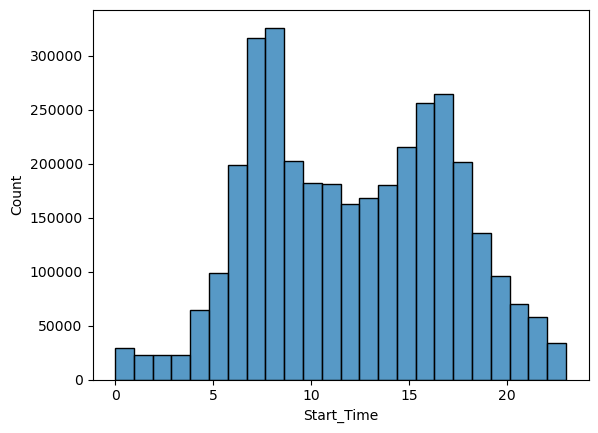

In [25]:
sns.histplot(df.Start_Time.dt.hour, bins=24)

##### A high percentage of accidents occur between 7 am to 11 am and 4 pm to 7 pm

#### 2. Which days of the week have the most accidents ? 

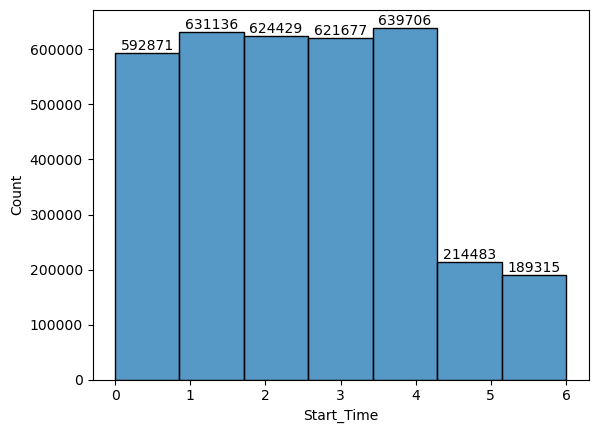

In [28]:
ax = sns.histplot(df.Start_Time.dt.dayofweek, bins=7)
for bars in ax.containers:
    ax.bar_label(bars)

##### There are less number of accidents on weekends than compared to workdays (Mon - Fri)

#### 3. Are accidents increasing or decreasing over the years ?

<Axes: xlabel='Start_Time', ylabel='Count'>

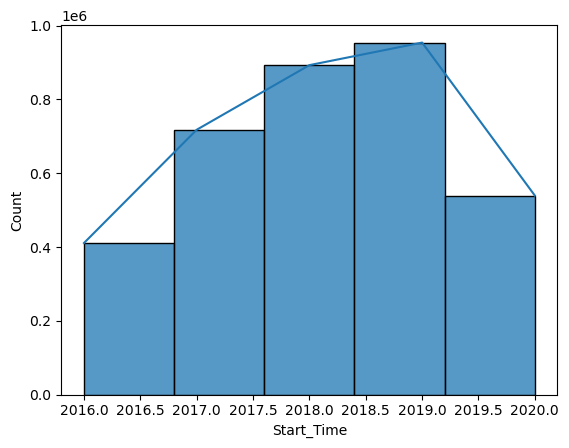

In [31]:
x = df.Start_Time.dt.year.value_counts().sort_index(ascending=True)
sns.histplot(df.Start_Time.dt.year, bins=5)
x.plot()

##### The number of accidents are increasing over the years (The number of accidents for 2020 is low in this chart because we only have data up to June 2020)

#### 4. Which 10 states have the highest number of accidents?

<Axes: xlabel='State'>

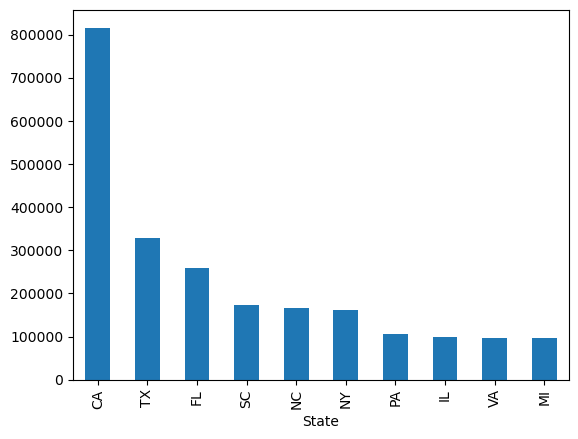

In [34]:
state_count = df.State.value_counts().sort_values(ascending=False).head(10)

state_count.plot(kind='bar')


#### 5. Which 10 cities have the highest number of accidents?

<Axes: xlabel='City'>

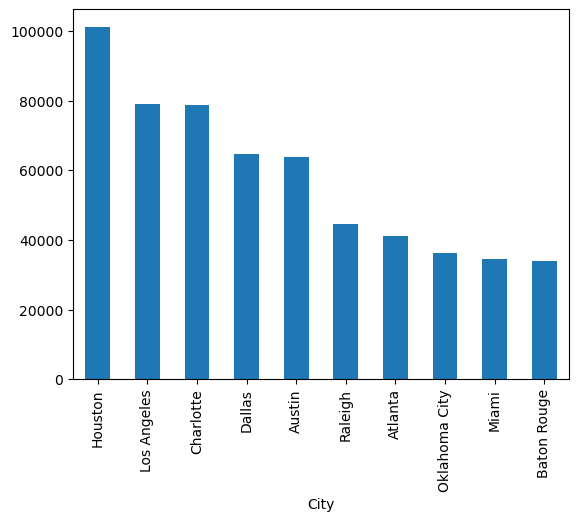

In [36]:
city_count = df.City.value_counts().sort_values(ascending=False).head(10)

city_count.plot(kind='bar')

#### 6. Are there more accidents in warmer or colder areas?

In [38]:
def temp(x):
    if x <= 60:
        return "Cold"
    elif x > 60 and x <= 75:
        return "Moderate"
    else:
        return "Warm"

In [39]:
df['Weather_Type'] = df['Temperature(F)'].apply(temp)

In [40]:
weather_counts = df['Weather_Type'].value_counts()

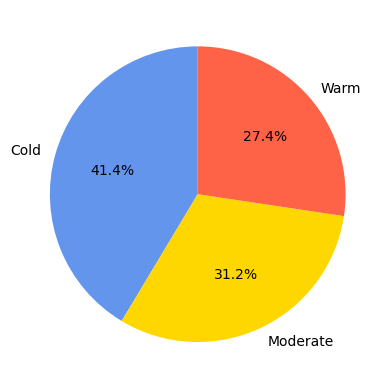

In [41]:
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', startangle=90, colors = ['cornflowerblue','gold','tomato']);

##### A high percentage of accidents occur in cold regions followed by regions with moderate temperature

#### 7. What is the distribution of accidents in different weather conditions ?

<Axes: xlabel='count', ylabel='Weather_Condition'>

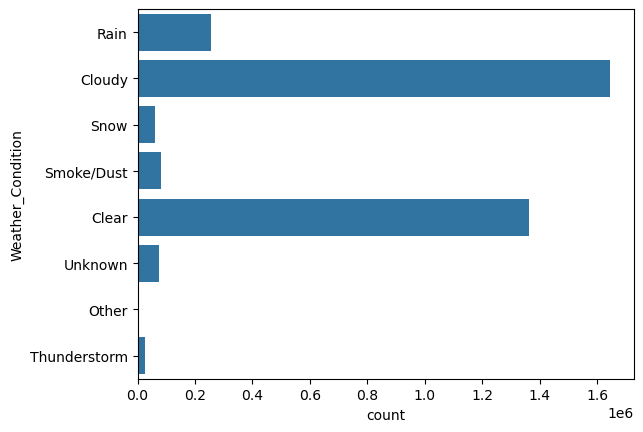

In [44]:
sns.countplot(df['Weather_Condition'])

##### Cloudy and Clear weather accounts for significant number of accidents
##### Rainy, Snow and Other contribute to a fewer number of accidents
##### Thunderstorms are rare in the dataset, likely due to fewer drivers on the road during such extreme weather

#### 8. Is there a correlation between visibility and the number of accidents ?

<Axes: xlabel='Visibility(mi)', ylabel='Count'>

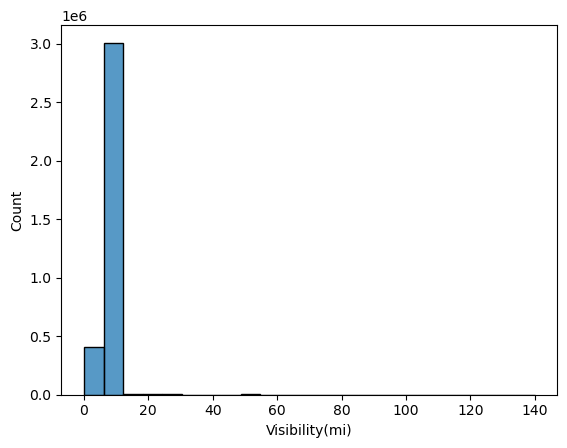

In [47]:
sns.histplot(df['Visibility(mi)'])

##### There is a significant number of accidents in areas with low visibility, suggesting a strong correlation between visibility and the occurrence of accidents

#### 9. What was the severity of the accidents ?

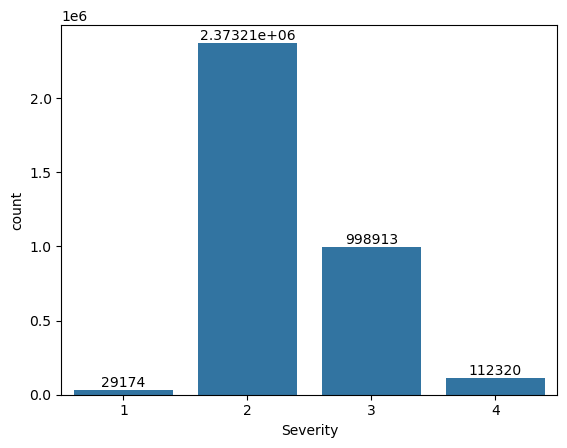

In [50]:
ax = sns.countplot(x=df.Severity)
for bars in ax.containers:
    ax.bar_label(bars)

#### 10. What is the distribution of accidents during the day and night ? 

In [52]:
day_night = df['Sunrise_Sunset'].value_counts()

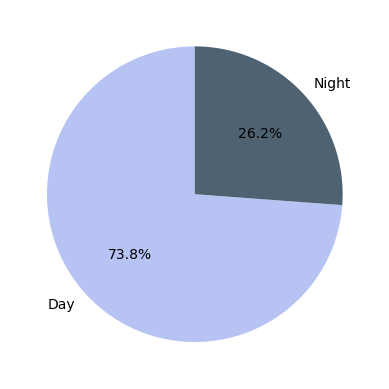

In [53]:
plt.pie(day_night, labels=day_night.index, autopct='%1.1f%%', startangle=90 , colors =['#B7C3F3','#4F6272']);

##### A high percentage of accidents occurred during the day than at night

#### 11. Is there a difference in accident severity between day and night?

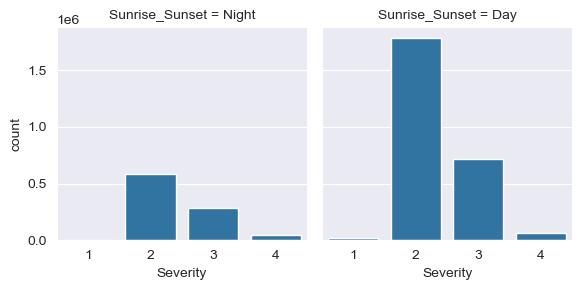

In [56]:
sns.set_style("darkgrid")
severity_order = sorted(df['Severity'].unique())
g = sns.FacetGrid(df, col="Sunrise_Sunset")
g.map(sns.countplot, "Severity",order=severity_order)

##### There is not any major difference in the severity of accidents between day and night

#### 12. What is the distribution of accidents by different road features (Junctions, Crossings, Traffic Signals, Bump, Stop Sign, Roundabout Sign)?

In [59]:
count = [len(df[df.Bump == True]),len(df[df.Traffic_Signal == True]),len(df[df.Stop == True]),
         len(df[df.Junction == True]),len(df[df.Roundabout == True]),len(df[df.Crossing== True]),]
labels = ['Bump','Traffic_Signal','Stop','Junction','Roundabout Sign','Crossing']
new_df = pd.DataFrame(count,labels)


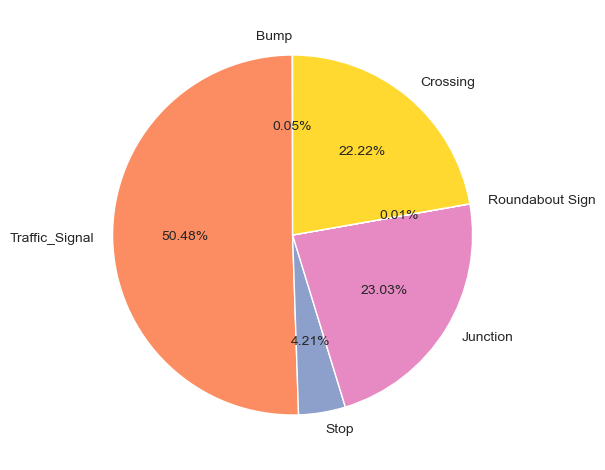

In [60]:
plt.pie(new_df[0], labels=new_df.index, autopct='%1.2f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.tight_layout()

##### Traffic Signals account for the highest percentage of accidents, with 50.48%.
##### Crossings and junctions are also critical areas for accidents.
##### Stop Signs, Bumps and Roundabout Signs have a very minimal contribution to accidents, with 4.21%, 0.05% and 0.01% respectively.

#### 13. What is the average duration of accidents ?

In [63]:
df['Duration'] = df['End_Time']-df['Start_Time']
df['Duration'] = df['Duration'].dt.total_seconds() / 60
df['Duration'].mean()

115.3183564543318

##### The avergae duration of accidents is 115 minutes

#### 14.  Are severe accidents (higher Severity score) more likely to last longer than minor accidents ?

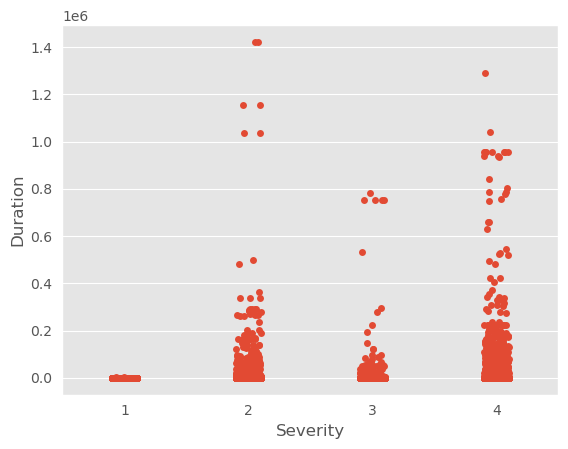

In [66]:
plt.style.use('ggplot')
sns.stripplot(x = 'Severity' , y = 'Duration' ,data=df, jitter = True)
plt.style.use('default')

##### The accidents with severity 1 seem to have very low durations
##### Severity 2 accidents tend to have some accidents lasting much longer, though most points are still concentrated in shorter durations and Severity 3 accidents tend to have a average duration
##### Severity 4 shows a larger number of accidents with both short and long durations, indicating that these more severe accidents could last significantly longer in some cases.

#### 15. Where are the most frequent accident hotspots located, based on the start and end coordinates of accidents ?

In [115]:
# creating a sample DataFrame from the original data because the original data is too large to visualize on a map
sample_df = df.sample(int(0.1 * len(df)))

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

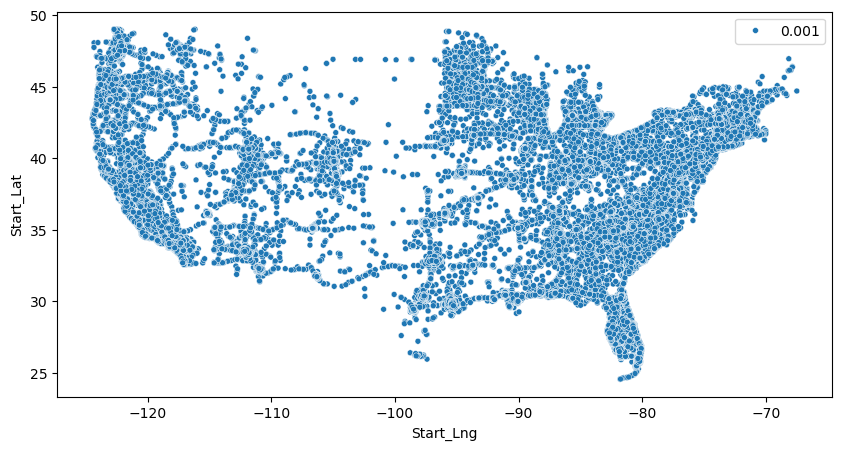

In [133]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)
